## Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.



## The notebook consist of below 4 parts

* Data Understanding, Preparation, and Pre-Processing
* Exploratory Data Analysis 
* Feature Engineering and Variable Transformation
* Model Selection, Model Building, and  Prediction

### Data Understanding, Preparation, and Pre-Processing

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# To show all the columns in the dataset
pd.set_option("display.max_columns", None)

In [2]:
#reading data
df=pd.read_csv("train (1).csv")

In [3]:
#checking shape of data
df.shape

(69999, 172)

In [4]:
## checking sample of data
df.head(100)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.00,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.00,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.00,0.0,0.66,0.00,0.00,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.00,0.0,0.01,0.00,0.00,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,Na

In [5]:
df[df.total_rech_data_6 > 0]["total_rech_data_6"]

4        7.0
7        1.0
10       1.0
15       1.0
16       1.0
        ... 
69984    3.0
69989    2.0
69993    9.0
69997    1.0
69998    1.0
Name: total_rech_data_6, Length: 17568, dtype: float64

In [6]:
#checking null values and data types in columns
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

##### Calculating the Total Amount Spent By customers on Recharge 

In [7]:
## Total Amount Spent will be - total_rech_num_x *  total_rech_amt_x  

In [8]:
#  First setting null values with 0
amt_cols = ['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6',
                'total_rech_data_7','total_rech_data_8']
for col in amt_cols:
    df[col].fillna(value=0,inplace=True)

In [9]:
df["total_rech_data_amt_6"] = df.av_rech_amt_data_6 * df.total_rech_data_6
df["total_rech_data_amt_7"] = df.av_rech_amt_data_7 * df.total_rech_data_7
df["total_rech_data_amt_8"] = df.av_rech_amt_data_7 * df.total_rech_data_8
## Now we can drop the individual amount and number columns
df.drop(['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6',
              'total_rech_data_7','total_rech_data_8'],axis = 1,inplace = True)

##### The dataset has 135 float columns, 28 integer and 9 string type columns.
##### Out of 70k records, many columns have less than 20k values in them. They have only 25% of values. So we can drop them.

In [10]:
lst=[]
for i in df.columns:
    if int((df[i].isna().sum()/df.shape[0])*100)>70:
        lst.append(i)
print(len(lst),lst)

24 ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


##### Above 24 columns would be dropped as they dont have sufficient data

In [11]:
df.drop(columns=lst,axis=0,inplace=True)

In [12]:
#checking new shape
df.shape

(69999, 145)

In [13]:
#dropping rows having all null values
df=df.dropna(axis=0,how='all')

In [14]:
#checking new shape
df.shape

(69999, 145)

##### There is not change in rows of original dataset after dropping rows with all null values. This means no row has all null values in dataset.

##### Checking if in a columns all values are unique or contains a single not null value in all rows because these columns do not add much information to model

In [15]:
# calculating unique values of each column and checking on that
k=df.nunique()
j=k[(k.values ==1) | (k.values==69999)]
j.index

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [16]:
#dropping the columns 
df.drop(j.index,axis=1,inplace=True)

In [17]:
#checking new shape
df.shape

(69999, 131)

In [18]:
df['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

##### we can see that we have around 62K data for loyal customers and around 7k data for churned customer

In [19]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 131 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    arpu_6                 69999 non-null  float64
 1    arpu_7                 69999 non-null  float64
 2    arpu_8                 69999 non-null  float64
 3    onnet_mou_6            67231 non-null  float64
 4    onnet_mou_7            67312 non-null  float64
 5    onnet_mou_8            66296 non-null  float64
 6    offnet_mou_6           67231 non-null  float64
 7    offnet_mou_7           67312 non-null  float64
 8    offnet_mou_8           66296 non-null  float64
 9    roam_ic_mou_6          67231 non-null  float64
 10   roam_ic_mou_7          67312 non-null  float64
 11   roam_ic_mou_8          66296 non-null  float64
 12   roam_og_mou_6          67231 non-null  float64
 13   roam_og_mou_7          67312 non-null  float64
 14   roam_og_mou_8          66296 non-nul

In [20]:
#checking on object data types
df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/22/2014,7/10/2014,8/24/2014
1,6/12/2014,7/10/2014,8/26/2014
2,6/11/2014,7/22/2014,8/24/2014
3,6/15/2014,7/21/2014,8/25/2014
4,6/25/2014,7/26/2014,8/30/2014


In [21]:
##### converting string to dates
df['date_of_last_rech_6']=pd.to_datetime(df['date_of_last_rech_6'])
df['date_of_last_rech_7']=pd.to_datetime(df['date_of_last_rech_7'])
df['date_of_last_rech_8']=pd.to_datetime(df['date_of_last_rech_8'])

In [22]:
df['date_of_last_rech_7'].isna().sum()

1234

##### Filling null values in date columns with mode

In [23]:
df['date_of_last_rech_6'].fillna(value=df['date_of_last_rech_6'].mode(),inplace=True)
df['date_of_last_rech_7'].fillna(value=df['date_of_last_rech_7'].mode(),inplace=True)
df['date_of_last_rech_8'].fillna(value=df['date_of_last_rech_8'].mode(),inplace=True)

##### Filling all null values in data with mean of columns

In [24]:
for i in df.columns[df.isnull().sum()!=0]:
    df[i].fillna(value=df[i].mean(),inplace=True)

In [25]:
df.columns[df.isnull().sum()!=0]

Index([], dtype='object')

##### All null values were filled.

### Exploratory Data Analysis

#### Importing EDA Libraries

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Univariate Analysis on numeric columns

/var/folders/mh/2rbnzn3n7d95nv54sf0nmhxm0000gn/T/ipykernel_59694/2184416410.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


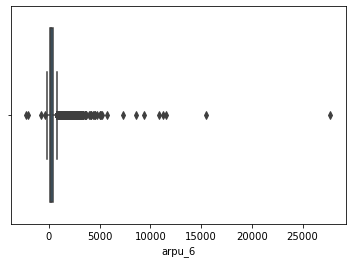

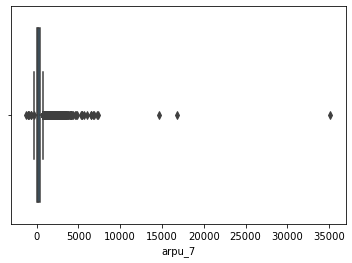

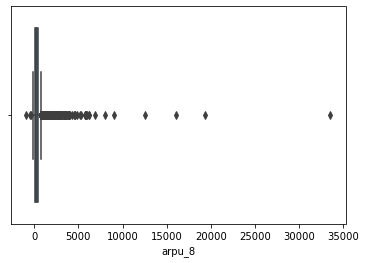

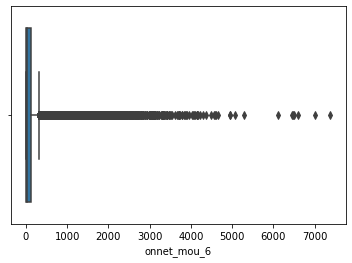

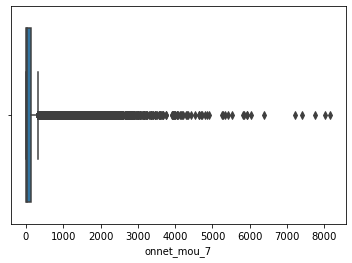

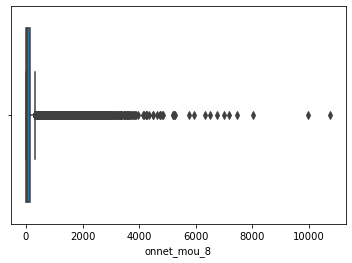

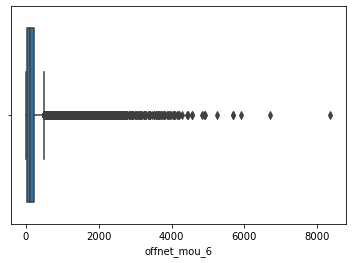

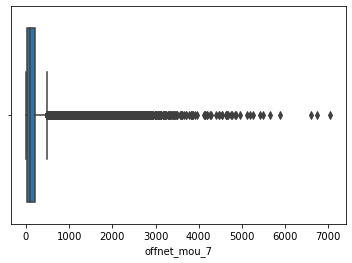

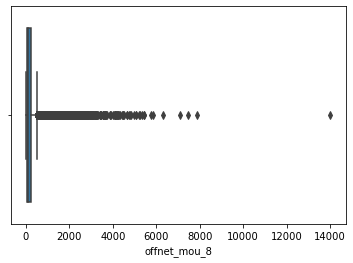

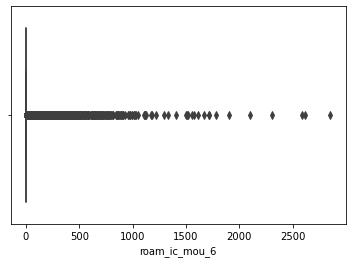

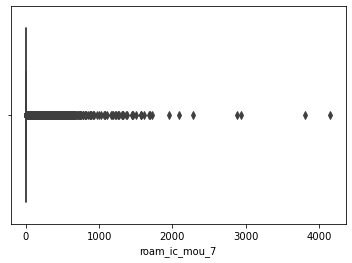

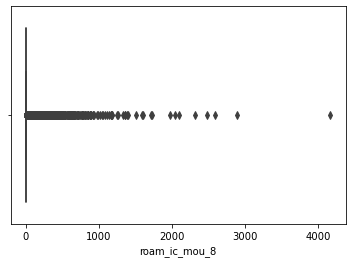

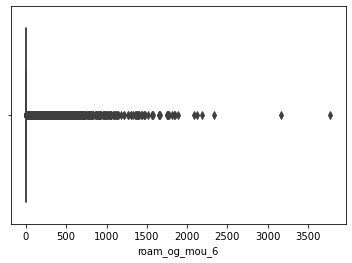

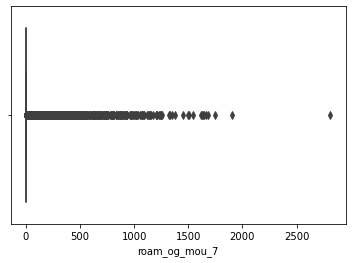

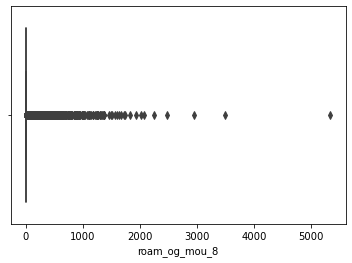

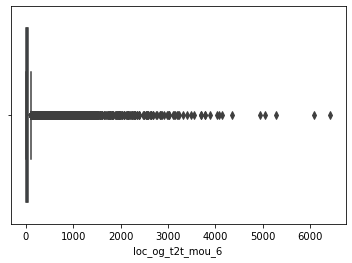

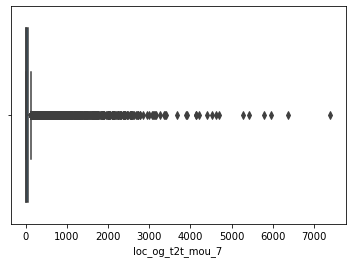

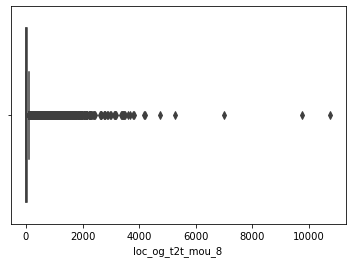

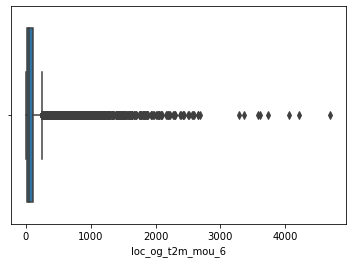

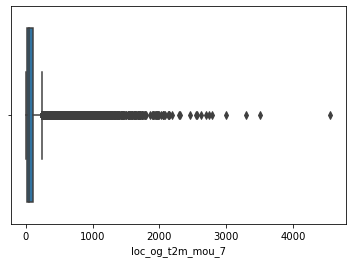

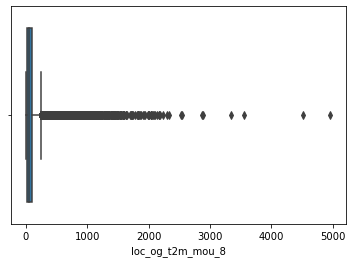

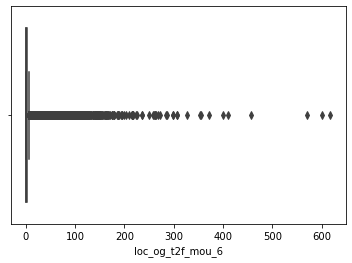

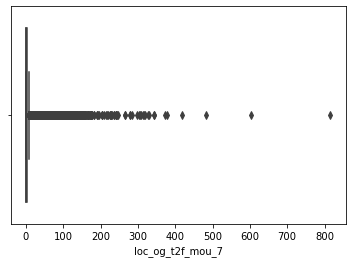

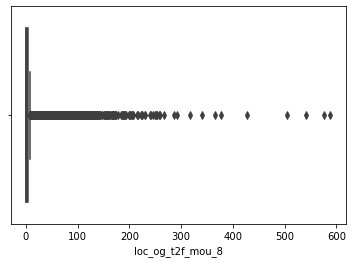

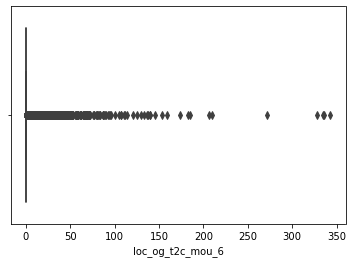

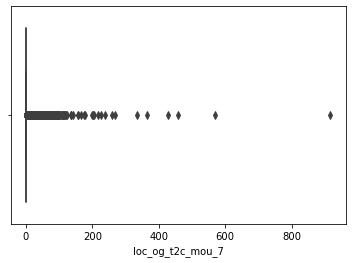

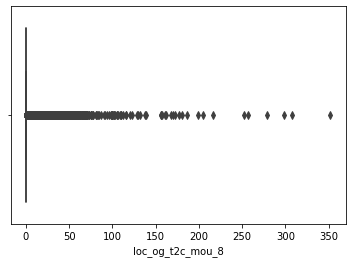

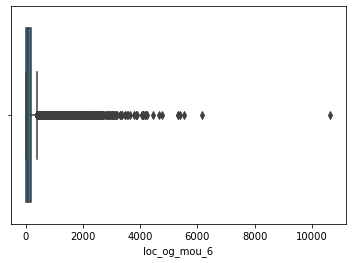

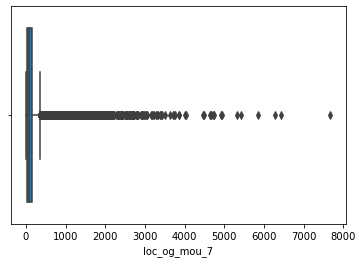

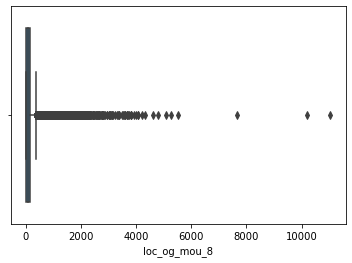

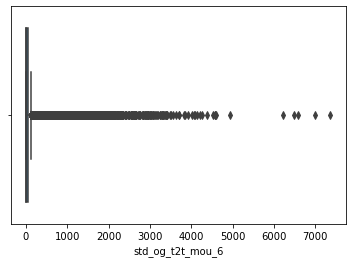

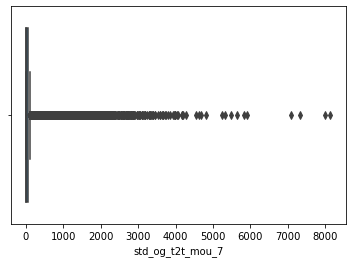

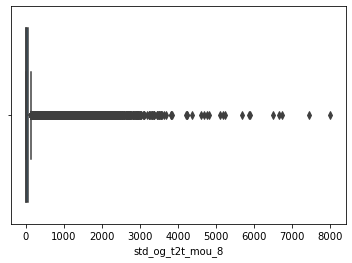

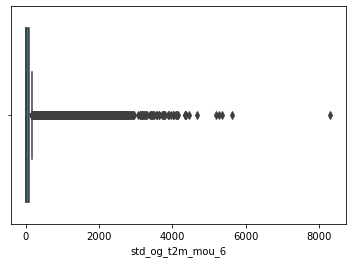

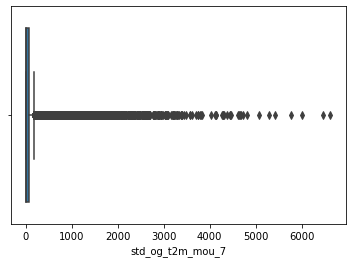

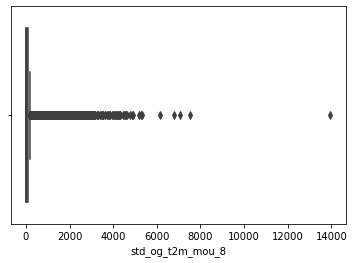

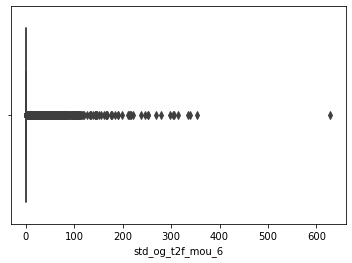

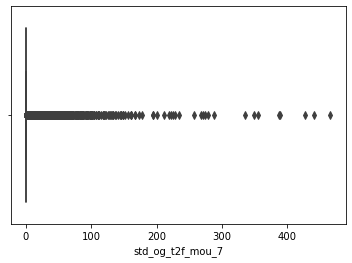

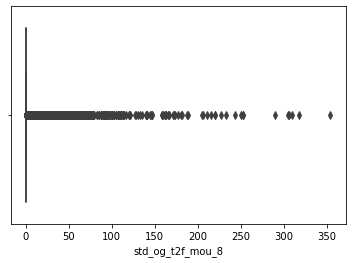

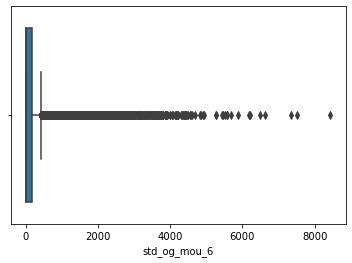

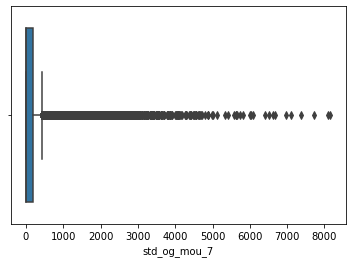

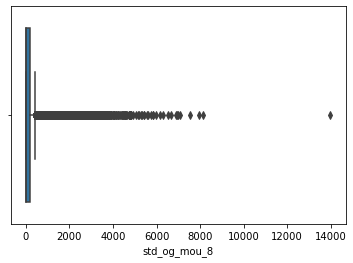

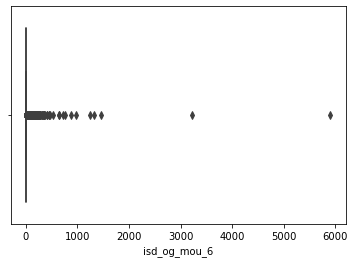

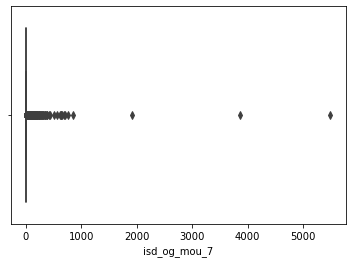

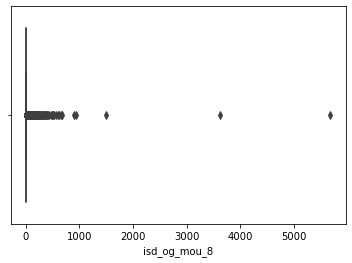

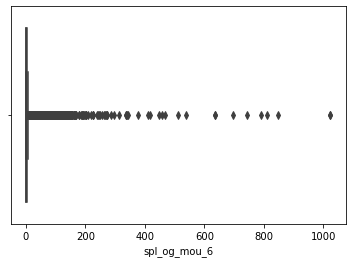

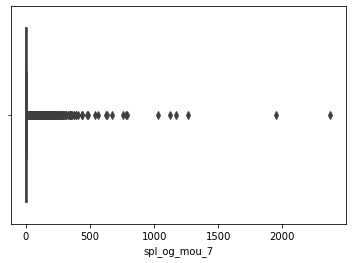

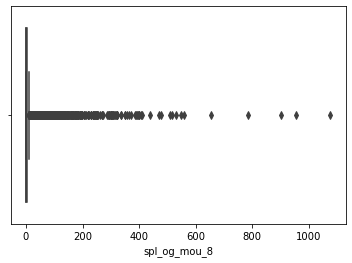

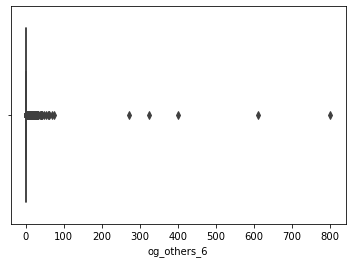

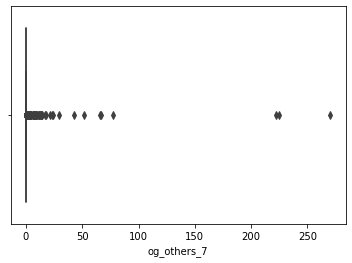

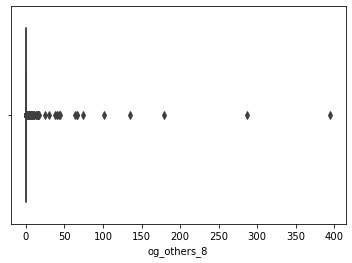

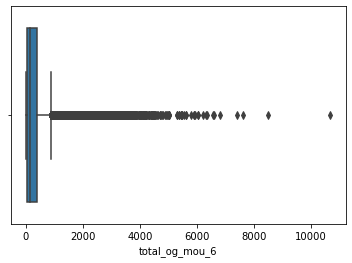

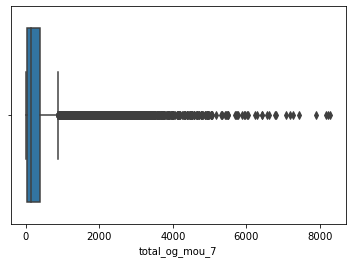

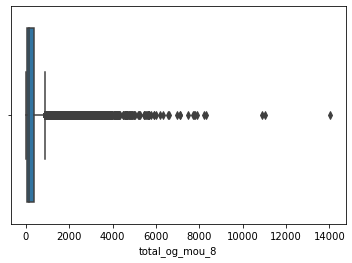

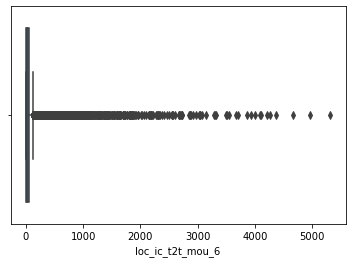

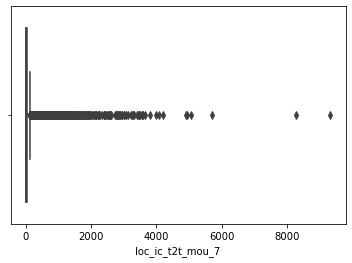

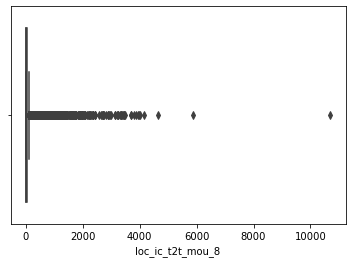

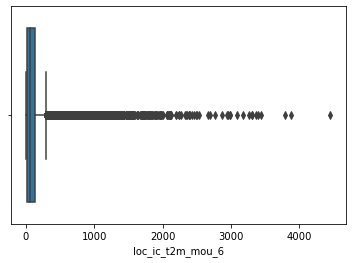

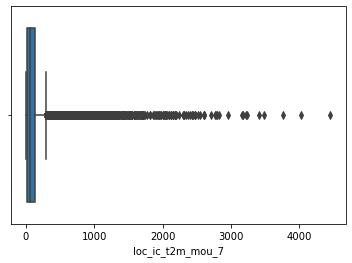

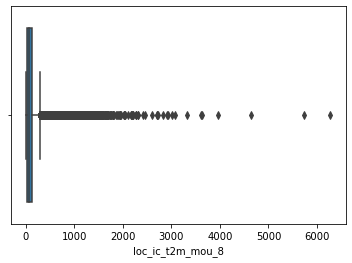

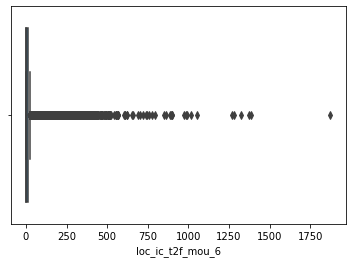

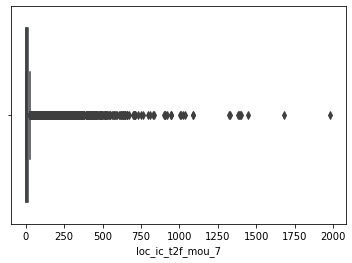

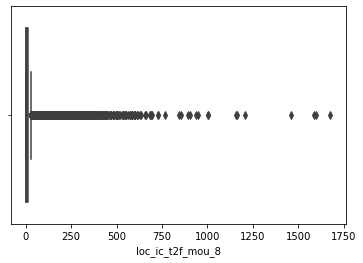

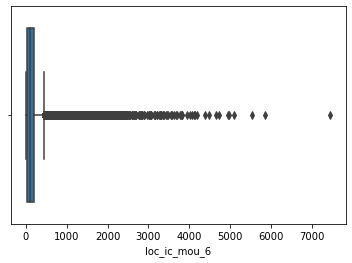

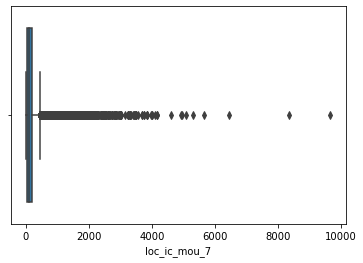

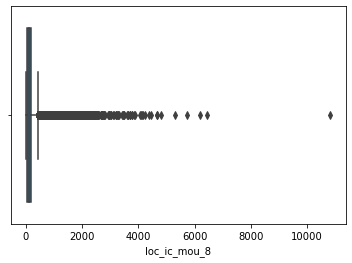

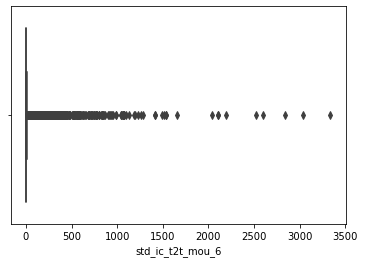

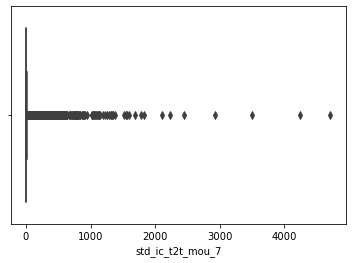

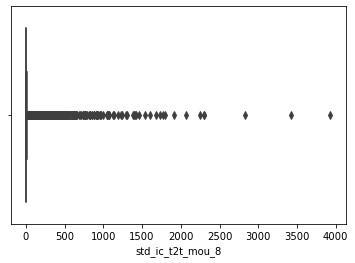

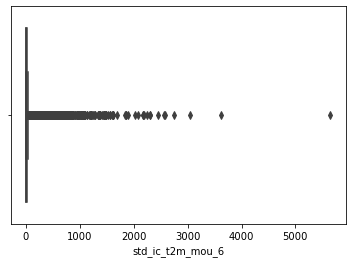

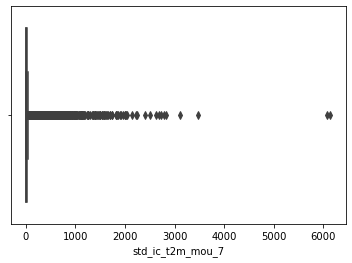

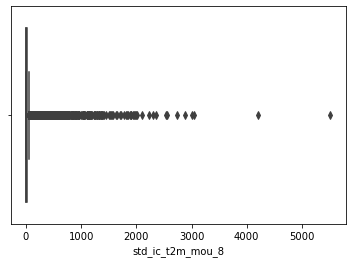

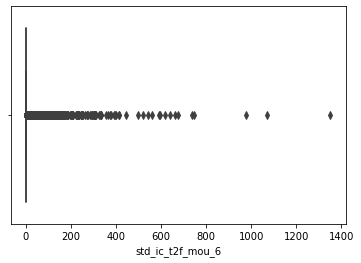

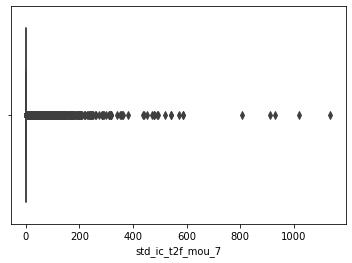

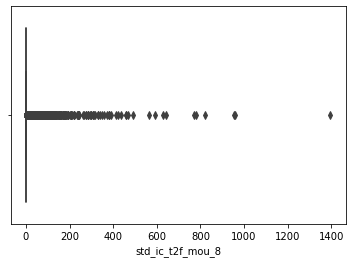

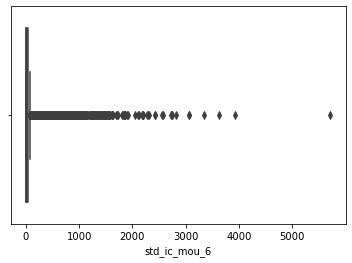

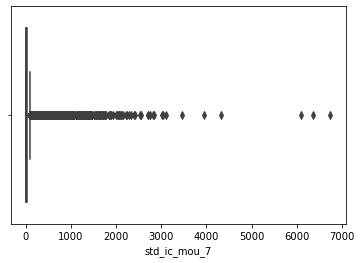

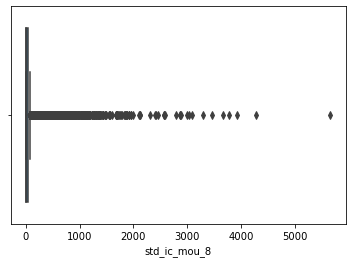

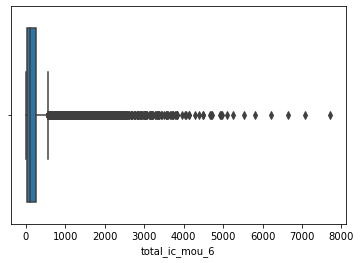

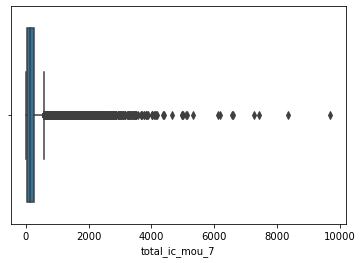

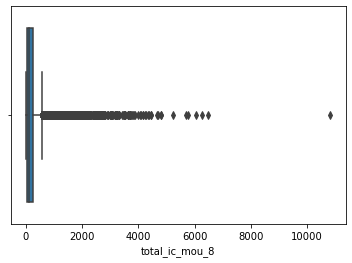

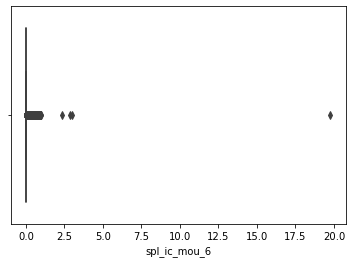

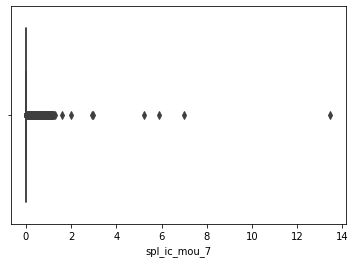

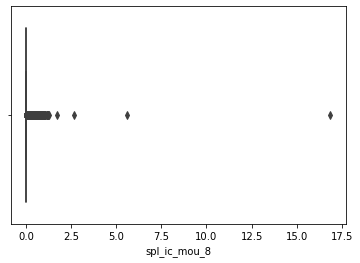

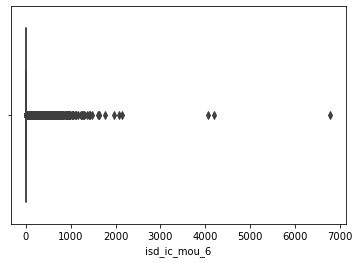

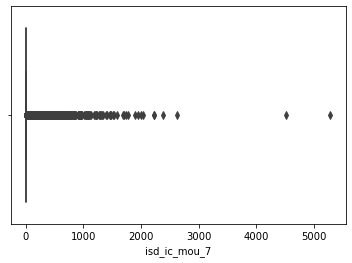

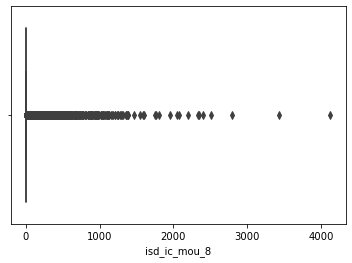

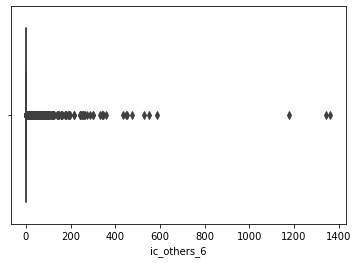

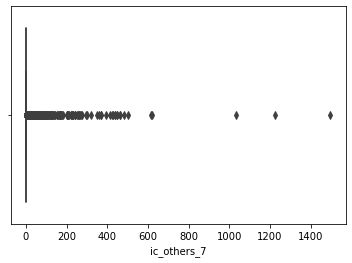

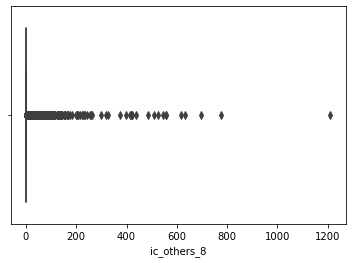

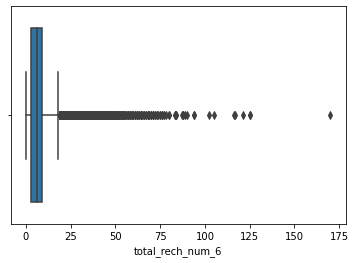

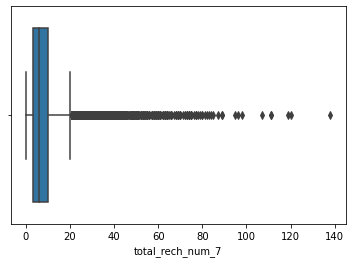

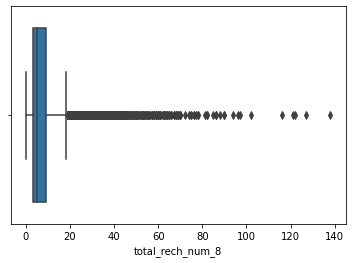

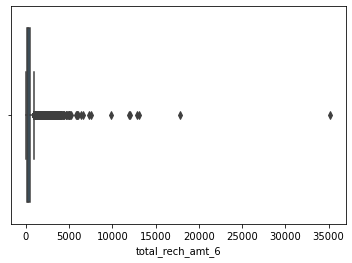

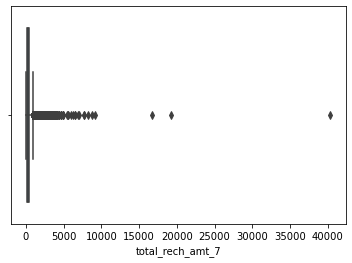

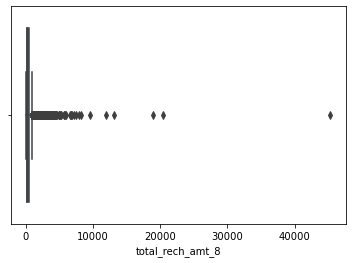

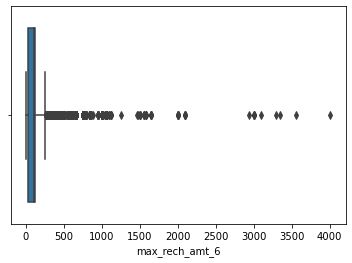

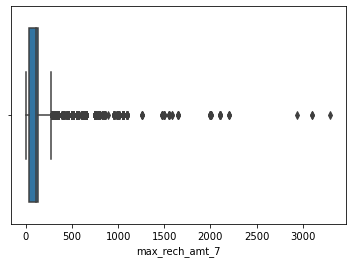

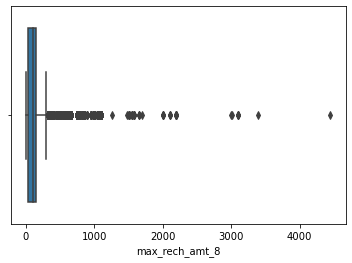

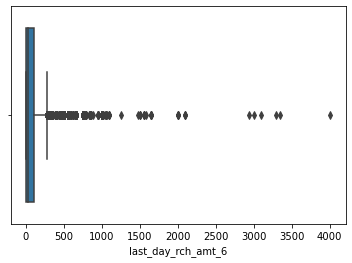

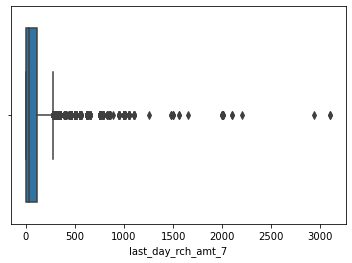

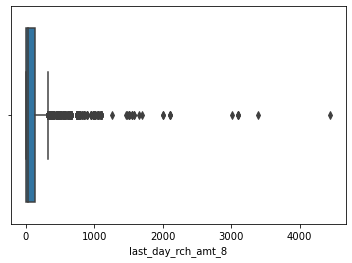

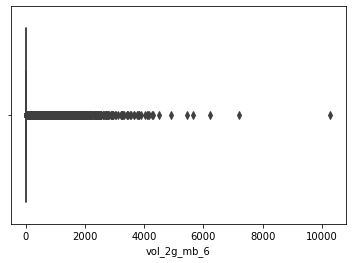

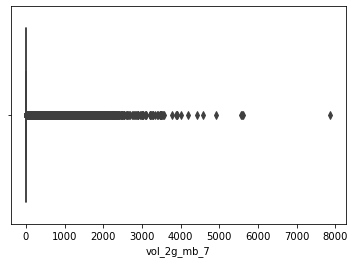

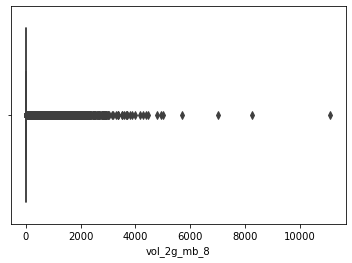

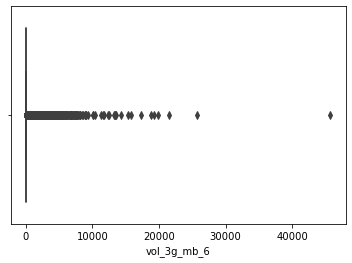

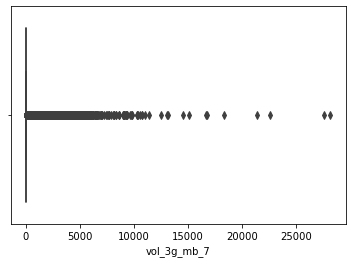

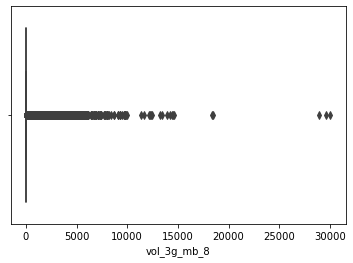

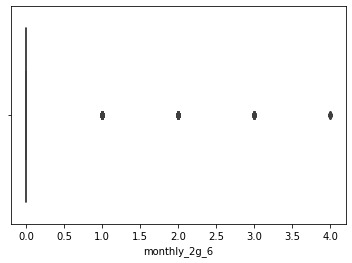

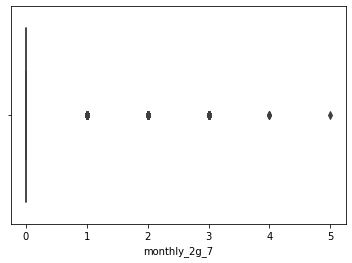

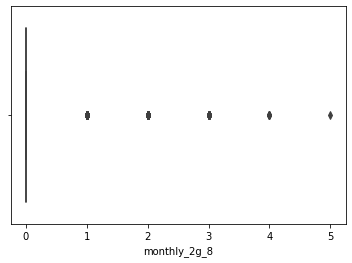

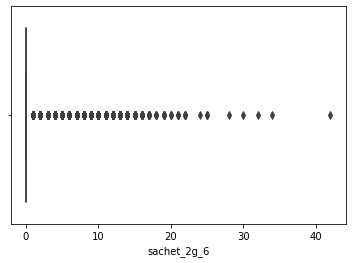

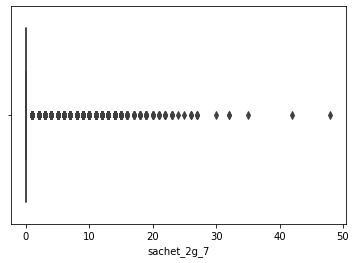

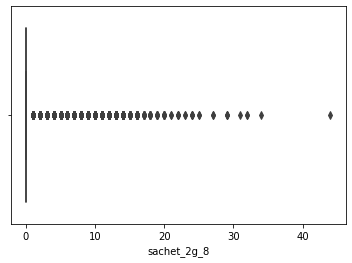

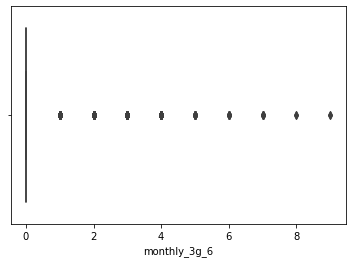

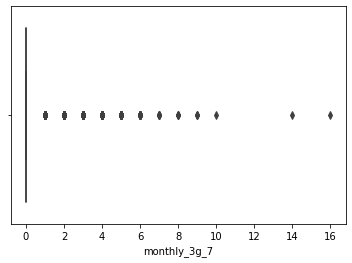

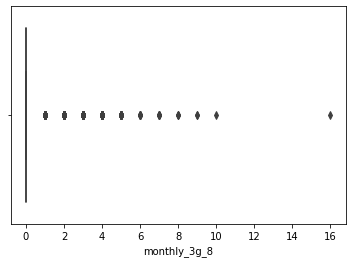

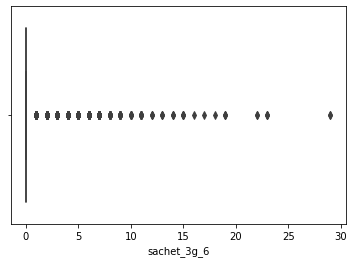

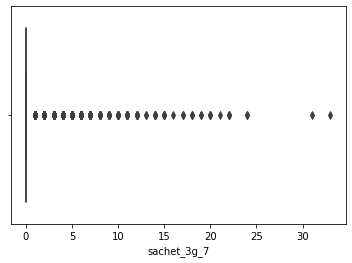

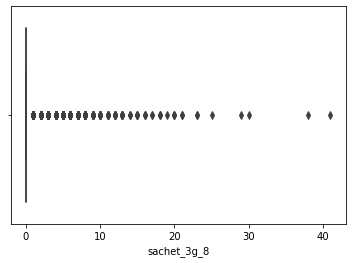

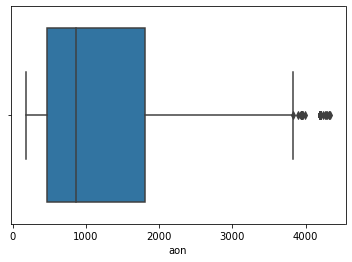

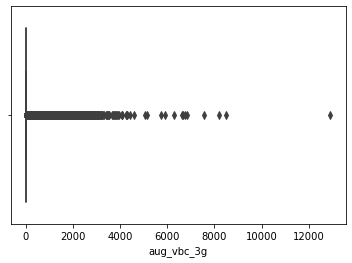

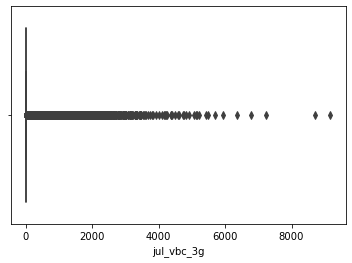

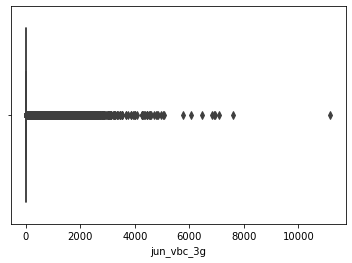

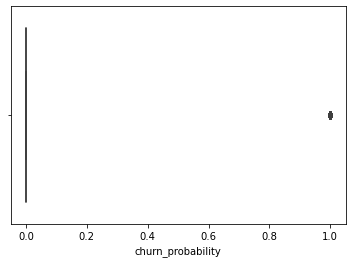

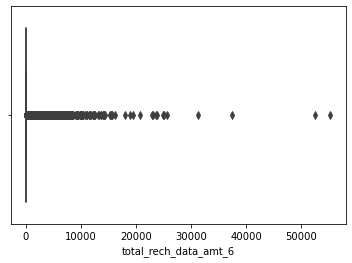

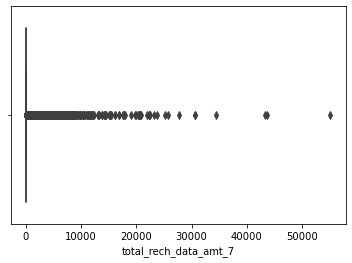

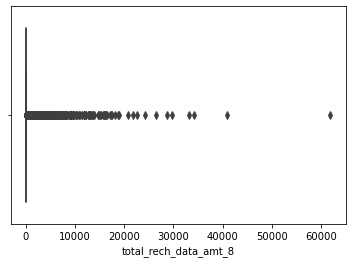

In [27]:
#starting with numerical columns
for i,col in enumerate(df.describe().columns):
    plt.figure(i)
    sns.boxplot(data=df,x=col)

In [28]:
df.shape

(69999, 131)

### Checking the correlation between the features

In [29]:
cor_matrix = df.corr().abs()
# print(cor_matrix)

#getting upper triangle in the corr matrix 
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
# print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70  )]
print(to_drop)


['arpu_7', 'arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'isd_ic_mou_7', 'isd_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'vol_3g_mb_8', 'sachet_2g_7', 'to

In [30]:
df.drop(columns=to_drop, inplace=True)
df.shape

(69999, 74)

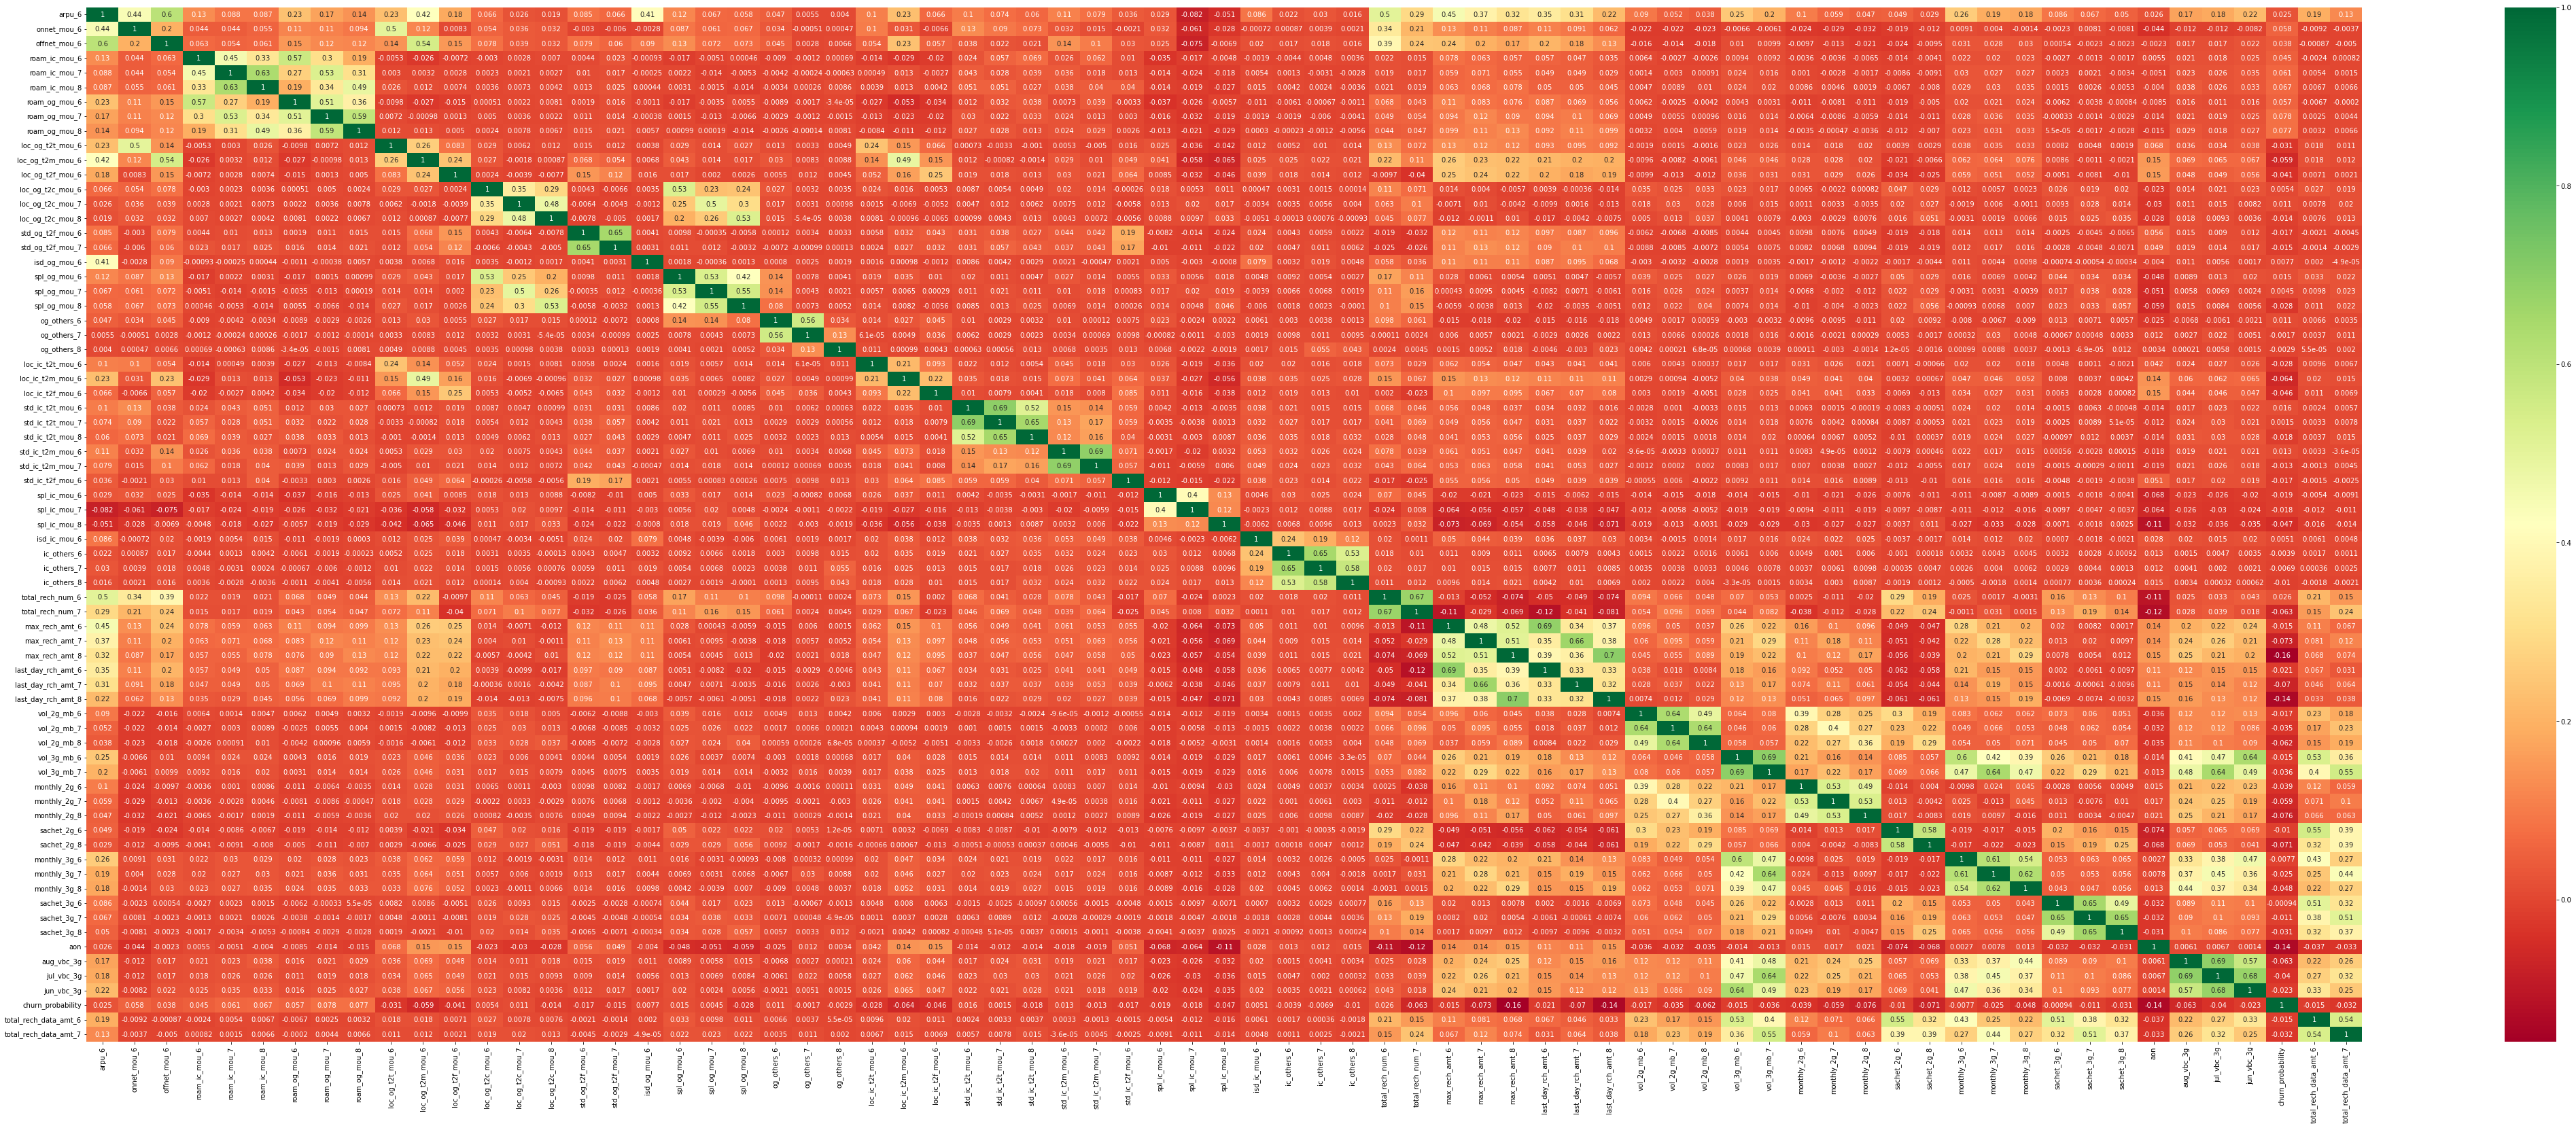

In [31]:

plt.figure(figsize=(75, 28))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [32]:
## Coverting AON(age of network) to months to see better insights

In [33]:
# lets now conevrt AON in months
df['aon_mon'] = df['aon']/30
df.drop('aon', axis=1, inplace=True)
df['aon_mon'].head()

0    65.266667
1    23.666667
2    29.400000
3    32.733333
4    21.566667
Name: aon_mon, dtype: float64

/Users/rajatgoel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tenure Graph')

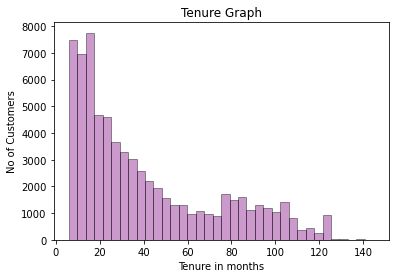

In [34]:
aon = sns.distplot(df['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
aon.set_ylabel('No of Customers')
aon.set_xlabel('Tenure in months')
aon.set_title('Tenure Graph')

In [35]:
tn_range = [0.0, 6.0, 12.0, 24.0, 60.0, 140.0]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df['tenure_range'] = pd.cut(df['aon_mon'], tn_range,labels= tn_label)
df['tenure_range'].head()

0    5 Yrs and above
1            1-2 Yrs
2            2-5 Yrs
3            2-5 Yrs
4            1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

<AxesSubplot:>

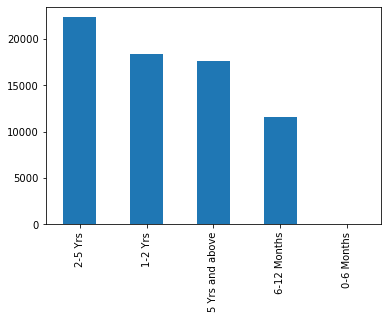

In [37]:
df['tenure_range'].value_counts().plot(kind='bar')

#### Churn Vs Tenure Range

In [ ]:
sns.boxplot(x = df.churn_probability, y = df.aon_mon)

#### Churn Rate

In [ ]:
# Lets look at the churn rate 
sns.countplot(data=df,x='churn_probability')

In [ ]:
churn_rate = (len(df[df.churn_probability==1])/len(df)) * 100


In [ ]:
churn_rate

## We can see above the churn rate is ~10%

##### checking numerical & catetorical features

In [93]:
# checking numerical columns
num_columns = [col for col in df.columns if df[col].dtype in ["int64", "float64"]  ]
num_columns
# as churn_probability is target variable we can remove that from the list
num_columns.remove("churn_probability")

In [58]:
categorical_features=[col for col in df.columns if df[col].dtype not in ["int64", "float64"]]
categorical_features

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'tenure_range']

In [94]:
#  we can remove all of these 

In [59]:
df.drop(categorical_features, axis =1 , inplace=True)

### Implementing the scaling and PCA 

In [62]:
X = df.copy()
X = X.drop(['churn_probability'], axis = 1)
y = df["churn_probability"]

In [63]:
X.columns

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'isd_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol

0        0
1        0
2        0
3        0
4        0
        ..
69994    0
69995    0
69996    0
69997    0
69998    0
Name: churn_probability, Length: 69999, dtype: int64

In [95]:
## Doing the scaling on Numerical features
from sklearn.preprocessing import StandardScaler


In [77]:
scaler = StandardScaler()
X[num_columns] = scaler.fit_transform(X[num_columns])


In [92]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [79]:
X_train.shape

(48999, 70)

In [80]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)
# apply PCA on train data
pca.fit(X_train)

PCA(random_state=100)

In [81]:
pca.components_

array([[ 2.17405908e-01,  5.80167264e-02,  1.09147130e-01, ...,
         1.99472651e-01,  2.07415181e-01,  2.78800121e-02],
       [-1.64091042e-01, -1.02986371e-01, -1.69958672e-01, ...,
         2.35591390e-01,  2.43916716e-01, -1.15203389e-01],
       [ 2.01192812e-01,  1.89580918e-01,  2.22766424e-01, ...,
         1.18004215e-02, -1.09187255e-04, -6.05036542e-02],
       ...,
       [ 3.88608647e-01, -1.56171699e-01, -1.51612574e-01, ...,
         4.69995897e-01, -2.35689204e-01, -1.73523873e-02],
       [-2.52726255e-01,  7.70903889e-02,  6.79020733e-02, ...,
        -1.89281535e-02,  3.27221973e-02, -3.56373049e-03],
       [-4.16322706e-02,  9.11417427e-03,  1.07232506e-02, ...,
         8.36306523e-03,  3.91358831e-02, -2.81453310e-03]])

In [82]:
pca.explained_variance_ratio_

array([0.09379979, 0.06021743, 0.05204705, 0.0420563 , 0.04075504,
       0.0389872 , 0.03577429, 0.03218253, 0.02965574, 0.0234089 ,
       0.02291362, 0.0227729 , 0.02124288, 0.02034715, 0.01886228,
       0.0181066 , 0.01703992, 0.01628709, 0.01590322, 0.01512234,
       0.01438127, 0.01434089, 0.01417211, 0.01377145, 0.01337013,
       0.01326666, 0.01297673, 0.01266544, 0.01202531, 0.01181866,
       0.01161155, 0.01131266, 0.01098665, 0.01081019, 0.00987431,
       0.00935455, 0.00876182, 0.00850856, 0.00814428, 0.00804719,
       0.00760658, 0.00748152, 0.00723731, 0.00690375, 0.00649521,
       0.00627496, 0.00550646, 0.00530339, 0.00508207, 0.00495083,
       0.00486918, 0.00477745, 0.00471385, 0.00455326, 0.00439187,
       0.00431204, 0.00405353, 0.00386327, 0.00373053, 0.00370195,
       0.00354096, 0.00351824, 0.0033933 , 0.00320919, 0.00288645,
       0.00285852, 0.00201522, 0.00190346, 0.00186263, 0.00132038])

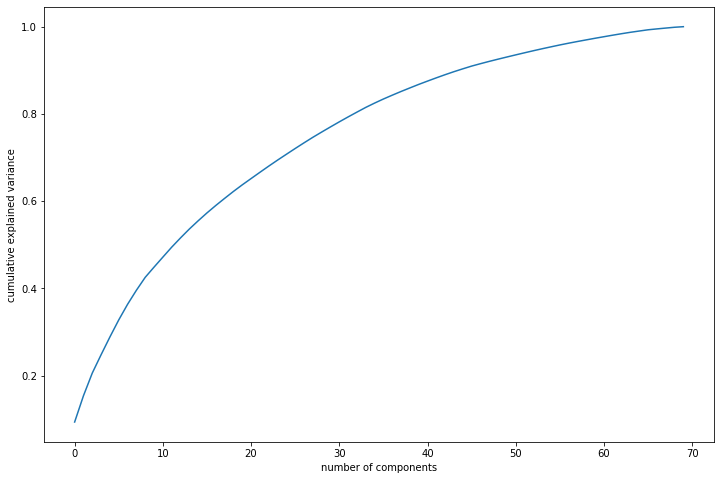

In [83]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [90]:
variance_cum = np.cumsum(pca.explained_variance_ratio_)
variance_cum[54] 

0.9538303267854935

In [91]:
## 55 components gives 95% of overall varaince

In [99]:
pca2 = PCA(n_components=55,random_state=100)
X_train_pca = pca2.fit_transform(X_train)
X_test_pca = pca2.fit(X_test)


In [101]:
X_train_pca.shape[1]

55

In [102]:
component_name = []
for i in range(1, X_train_pca.shape[1]+1):
    component_name.append("PC"+str(i))
    

In [103]:
df1 = pd.DataFrame(X_train_pca,columns = component_name)
df1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55
0,-0.834607,-0.744789,-0.911923,0.242257,-0.214945,0.291700,-0.354107,-0.370690,0.725844,-0.167419,-0.577162,-0.058581,-0.299642,0.456754,0.305023,-0.145004,-0.149220,0.141491,0.420574,-0.101547,-0.264062,0.020883,-0.550066,0.289871,-0.022542,-0.138124,-0.065696,-0.114715,0.144468,-0.378241,0.883233,0.522049,-0.308065,-0.271331,-0.197051,0.019238,-0.116121,0.070120,0.108313,0.223202,-0.040312,-0.043091,0.050968,-0.054517,-0.040313,0.029211,-0.236816,0.002390,-0.077820,0.026846,0.091613,0.036256,0.001659,-0.074118,-0.055549
1,-0.737957,-0.414258,0.000019,-0.018689,-0.133944,0.914959,1.062792,-0.663006,-0.205064,0.133233,-0.557359,0.006332,0.020518,0.015577,-0.022062,0.845805,-0.668703,0.054794,0.646201,-0.386842,-0.005375,-0.641180,-0.417438,0.180225,-0.045391,0.249512,0.100821,-0.273577,0.190640,-0.407282,-0.368404,0.513355,-0.542925,0.324241,-0.065846,-0.002933,0.533640,-0.157672,0.121745,0.212179,0.297474,-0.251503,0.209113,1.957404,-0.460157,-0.006699,-0.415450,-0.030347,-0.236456,0.084950,0.026321,0.154652,0.152371,0.244519,-0.013235
2,-0.883531,-0.633040,-0.744109,0.139277,-0.258713,0.229283,-0.001870,0.103334,0.397344,0.478869,0.584753,-0.415832,-0.349908,0.567820,-0.461855,0.191294,0.246742,-0.228288,0.447634,-0.269639,-0.371371,-0.091050,-0.397618,0.092182,-0.486411,0.204521,0.000927,-0.070032,0.147140,-0.089975,-0.019694,0.379371,-0.440421,0.201457,0.250014,-0.249107,-0.589954,-0.299465,0.302907,0.316146,-0.022118,0.014636,0.012171,0.100871,-0.081223,0.048898,-0.026226,0.043455,0.012083,0.054974,0.171073,0.075852,-0.017644,-0.115742,-0.006119
3,0.390862,-2.196941,0.985387,-0.873083,0.225366,1.184405,0.424886,3.046252,0.490310,-0.360395,-0.656146,-0.344014,0.002473,1.598358,0.450907,-0.390801,-0.807918,0.452511,0.140600,-0.447311,-0.346473,-0.173650,-0.200925,-0.263423,-0.467358,-0.471980,-0.227115,-0.760050,-0.101799,-0.514599,1.475375,0.145022,-0.370512,0.029298,0.643855,-0.168312,-0.579102,0.762939,0.263577,0.338342,-0.312190,-0.760839,-0.216056,-0.097339,-0.659617,0.000334,-0.136449,0.001747,-0.022280,-0.365097,-0.742057,-0.478807,0.147272,0.434586,-0.122493
4,-1.744286,0.379125,-1.043632,-0.098053,-0.395949,-0.361694,0.178038,0.305576,0.307137,0.111706,-0.523448,0.029318,0.279193,0.132824,-0.123801,0.160533,0.145261,0.002496,-0.043618,-0.285042,-0.042198,-0.135106,-0.033968,-0.087232,-0.069269,0.045045,0.049413,-0.077134,-0.145427,0.084984,-0.190973,-0.048547,-0.059986,0.289707,-0.006150,-0.006849,0.034978,-0.074388,0.035072,0.021746,-0.249771,0.000205,-0.043564,0.003462,-0.105161,-0.006111,0.120610,0.026853,0.183017,0.056314,0.047941,-0.045643,0.074010,-0.076554,-0.053547
